In [24]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [48]:
a = 0
b = 0.5

In [26]:
def f(x):
    return (x**5 - 2.9*x**3 + 6.5*x**2 - 7*x) * np.cos(2 * x)

In [52]:
f(0.422)

np.float64(-1.3296289195738968)

In [27]:
exact_value = quad(f, a, b)[0] #Точное значение интеграла

In [28]:
def radau_quadrature_2(f, a, b, fa):
    ''' Метод Радо 2-го порядка, функция принимает:
        f - подынтегральная функция,
        a - левая граница отрезка,
        b - правая граница отрезка,
        fa - значение функции на левом крае отрезка (фиксированный узел)
        Функция возвращает значение определённого интеграла '''
    w1 = (b - a) / 4
    w2 = 3 * (b - a) / 4
    x2 = (b - a) / 2 * 1 / 3 + (b + a) / 2
    return w1 * fa + w2 * f(x2)

In [49]:
radau_quadrature_2(f, a, b, 0)

np.float64(-0.505247890184686)

In [ ]:
def radau_quadrature_3(f, a, b, fa):
    ''' Метод Радо 3-го порядка, функция принимает:
            f - подынтегральная функция,
            a - левая граница отрезка,
            b - правая граница отрезка,
            fa - значение функции на левом крае отрезка (фиксированный узел)
        Функция возвращает значение определённого интеграла '''
    w1 = (b - a) / 9
    w2 = (16 + np.sqrt(6)) * (b - a) / 36
    w3 = (16 - np.sqrt(6)) * (b - a) / 36
    x2 = (b - a) / 2 * (1 - np.sqrt(6)) / 5 + (b + a) / 2
    x3 = (b - a) / 2 * (1 + np.sqrt(6)) / 5 + (b + a) / 2
    return w1 * fa + w2 * f(x2) + w3 * f(x3)

In [53]:
radau_quadrature_3(f, a, b, 0)

np.float64(-0.5033484871489818)

In [30]:
def adaptive_integration(f, a, b, eps, iterations=0, fa=None):
    ''' Адаптивный метод интеграла, функция принимает:
            f - подынтегральная функция,
            a - левая граница отрезка,
            b - правая граница отрезка,
            eps - заданная точность,
            iterations - счётчик числа итераций,
            fa - значение функции на левом крае отрезка, по умолчанию None
        Функция возвращает значение определённого интеграла с заданной точностью 
        и число итераций для достижения заданной точности'''
    if fa == None:
        fa = f(a)
    integral_2 = radau_quadrature_2(f, a, b, fa)
    integral_3 = radau_quadrature_3(f, a, b, fa)
    eps = eps / 2
    iterations += 1
    if abs(integral_3 - integral_2) <= eps:
        return integral_3, iterations
    else:
        mid = (a + b) / 2
        left_integral, left_iter = adaptive_integration(f, a, mid, eps, iterations, fa=fa)
        right_integral, right_iter = adaptive_integration(f, mid, b, eps, iterations)
        return left_integral + right_integral, left_iter + right_iter - iterations

In [31]:
many_eps = [0.1 ** i for i in range(1, 6)]
integral_and_it = [adaptive_integration(f, a, b, i) for i in many_eps]
many_errors, iterations = [abs(exact_value - integral_and_it[i][0]) for i in range(len(many_eps))], [integral_and_it[i][1] for i in range(len(many_eps))]

In [32]:
titles = ['Зависимость фактической ошибки от заданной точности', 'Зависимость числа итераций от заданной точности']
y_label_list = ['Ошибка', 'Число итераций']

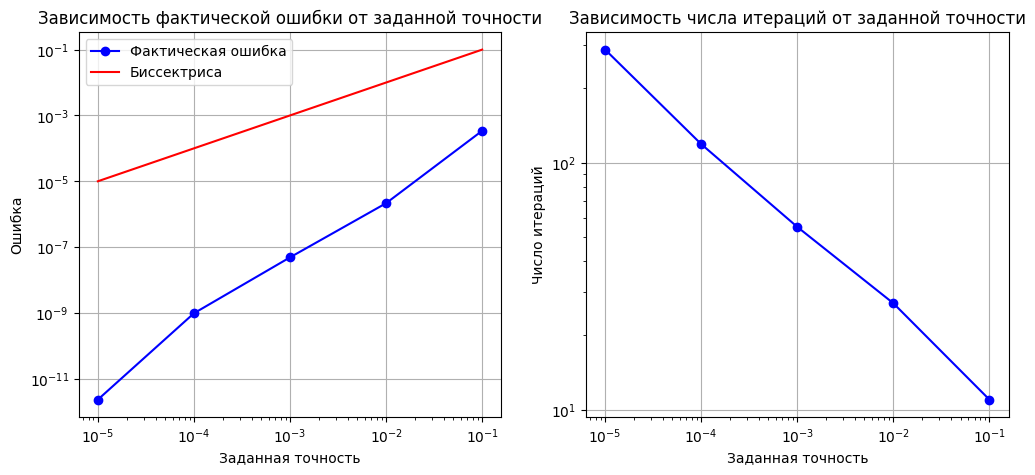

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].loglog(many_eps, many_errors, color = 'blue', label='Фактическая ошибка', marker='o')
ax[0].loglog(many_eps, many_eps, color = 'red', label='Биссектриса')
ax[0].legend()
ax[1].loglog(many_eps, iterations, color = 'blue', marker='o')
for i in range(2):
    ax[i].grid(True)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel(y_label_list[i])
    ax[i].set_xlabel('Заданная точность')

In [34]:
def Richardson(I1, I2, p=5):
    return I2 + (I2 - I1) / (2 ** p - 1)

In [35]:
def integral_with_Richardson(f, a, b, eps, fa=None):
    if fa == None:
        fa = f(a)
    integral_2 = radau_quadrature_2(f, a, b, fa)
    integral_3 = radau_quadrature_3(f, a, b, fa)
    eps = eps / 2
    if abs(integral_3 - integral_2) < eps:
        I_richardson = Richardson(integral_3, integral_2)
        return I_richardson
    else:
        mid = (a + b) / 2
        left_integral = integral_with_Richardson(f, a, mid, eps, fa=fa)
        right_integral = integral_with_Richardson(f, mid, b, eps)
        return left_integral + right_integral

In [36]:
many_errors_Richardson = [abs(exact_value - integral_with_Richardson(f, a, b, i)) for i in many_eps]

Text(0, 0.5, 'Фактическая ошибка')

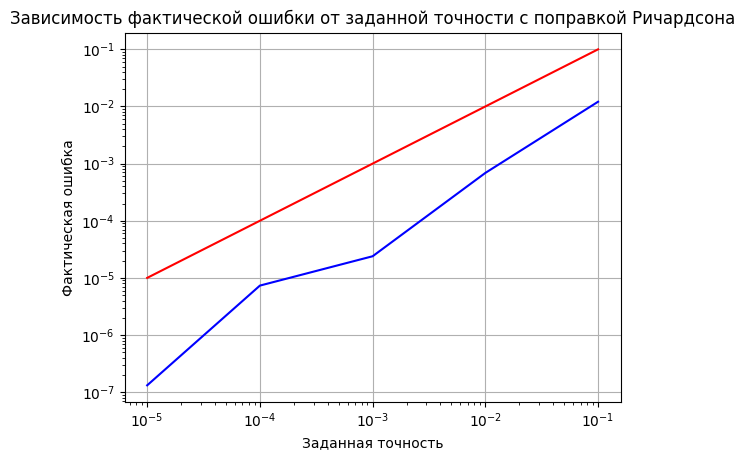

In [37]:
plt.title('Зависимость фактической ошибки от заданной точности с поправкой Ричардсона')
plt.loglog(many_eps, many_errors_Richardson, color='blue')
plt.loglog(many_eps, many_eps, color='red')
plt.grid(True)
plt.xlabel('Заданная точность')
plt.ylabel('Фактическая ошибка')

Text(0.5, 1.0, 'Зависимость фактической ошибки от длины отрезка разбиения')

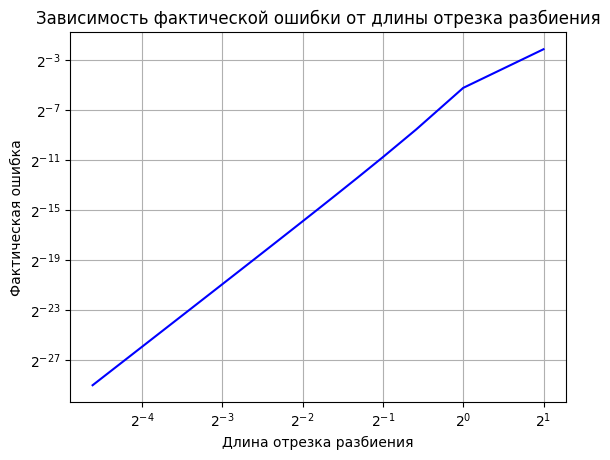

In [45]:
num_points = 50
lengths = []
errors = []
for i in range(1, num_points):
    integral = 0
    h = (b - a) / i
    for k in range(i):
        integral += radau_quadrature_3(f, a + k * h, a + (k + 1) * h, f(a + k * h))
    errors.append(abs(exact_value - integral))
    lengths.append(h)

plt.loglog(lengths, errors, base=2, color='blue')
plt.grid()
plt.xlabel('Длина отрезка разбиения')
plt.ylabel('Фактическая ошибка')
plt.title('Зависимость фактической ошибки от длины отрезка разбиения')


In [39]:
from scipy.stats import linregress
log_h = np.log2(lengths)
log_error = np.log2(errors)
slope, intercept, r_value, p_value, std_err = linregress(log_h, log_error)
slope, 2 ** intercept

(np.float64(4.991296917005121), np.float64(0.01612535039937817))

Дополнительное исследование

In [40]:
def g(x):
    return (x**5 - 2.9*x**3 + 6.5*x**2 - 7*x * np.cos(2 * x)) * np.abs(x - (b - a) / 2)

In [41]:
exact_value_g = quad(g, a, b)[0] #Точное значение интеграла

In [42]:
many_eps = [0.1 ** i for i in range(1, 6)]
integral_and_it = [adaptive_integration(g, a, b, i) for i in many_eps]
many_errors, iterations = [abs(exact_value_g - integral_and_it[i][0]) for i in range(len(many_eps))], [integral_and_it[i][1] for i in range(len(many_eps))]

In [43]:
titles = ['Зависимость фактической ошибки от заданной точности', 'Зависимость числа итераций от заданной точности']
y_label_list = ['Ошибка', 'Число итераций']

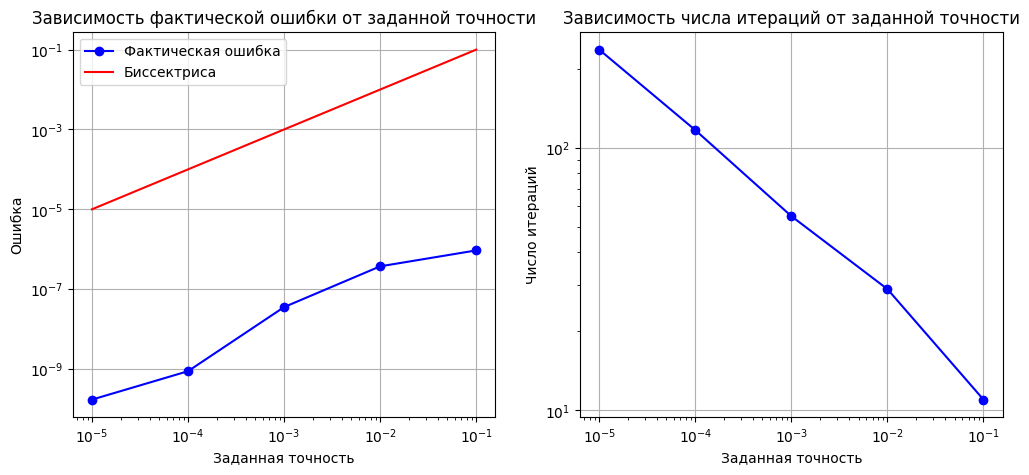

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].loglog(many_eps, many_errors, color = 'blue', label='Фактическая ошибка', marker='o')
ax[0].loglog(many_eps, many_eps, color = 'red', label='Биссектриса')
ax[0].legend()
ax[1].loglog(many_eps, iterations, color = 'blue', marker='o')
for i in range(2):
    ax[i].grid(True)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel(y_label_list[i])
    ax[i].set_xlabel('Заданная точность')